In [4]:
# Import Module
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [5]:
# Open File as Data & menampilkan sebagian data
dataOrigin = pd.read_excel ("[Dataset]_(Asuransi).xlsx",sheet_name="in")
dataOrigin.head()

,Unnamed: 0,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured_sex_FEMALE,insured_sex_MALE,...,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low
0,0,53300,0,5,1,2,71610,1,0,1,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,8,1,0,5070,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2,35100,0,7,3,3,34650,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3,48900,-62400,5,1,2,63400,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,4,66000,-46000,20,1,1,6500,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [6]:
# Table info
dataOrigin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Unnamed: 0                              1000 non-null   int64
 1   capital-gains                           1000 non-null   int64
 2   capital-loss                            1000 non-null   int64
 3   incident_hour_of_the_day                1000 non-null   int64
 4   number_of_vehicles_involved             1000 non-null   int64
 5   witnesses                               1000 non-null   int64
 6   total_claim_amount                      1000 non-null   int64
 7   fraud_reported                          1000 non-null   int64
 8   insured_sex_FEMALE                      1000 non-null   int64
 9   insured_sex_MALE                        1000 non-null   int64
 10  insured_occupation_adm-clerical         1000 non-null   int64
 11  insured_occupation

In [7]:
# Bersihkan kolom yang terlalu redudant

data = dataOrigin
# Membersihkan sex
data['insured sex'] = data['insured_sex_MALE'].apply(lambda x: 'Male' if x else 'Female')
data = data.drop(columns=['insured_sex_MALE', 'insured_sex_FEMALE'])
data.head()

# Membersihkan occupantion
def get_occupation(row):
    for col in occupation_columns:
        if row[col] == 1:
            return col.replace('insured_occupation_', '')
    return 'Unknown'

occupation_columns = [
    'insured_occupation_adm-clerical', 'insured_occupation_armed-forces',
    'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
    'insured_occupation_farming-fishing', 'insured_occupation_handlers-cleaners',
    'insured_occupation_machine-op-inspct', 'insured_occupation_other-service',
    'insured_occupation_priv-house-serv', 'insured_occupation_prof-specialty',
    'insured_occupation_protective-serv', 'insured_occupation_sales',
    'insured_occupation_tech-support', 'insured_occupation_transport-moving'
]

data['occupation'] = data.apply(get_occupation, axis=1)
data = data.drop(columns=occupation_columns)

# Membersihkan hobbies
hobbies_columns = [
    'insured_hobbies_chess', 'insured_hobbies_cross-fit', 'insured_hobbies_other'
]

def get_hobbies(row):
    for col in hobbies_columns:
        if row[col] == 1:
            return col.replace('insured_hobbies_', '')
    return 'Unknown'

data['hobbies'] = data.apply(get_hobbies, axis=1)
data = data.drop(columns=hobbies_columns)

# Membersihkan incident type
incidentType_columns = [
    'incident_type_Multi-vehicle Collision', 'incident_type_Parked Car',
    'incident_type_Single Vehicle Collision', 'incident_type_Vehicle Theft'
]

def get_incidentType(row):
    for col in incidentType_columns:
        if row[col] == 1:
            return col.replace('incident_type_', '')
    return 'Unknown'

data['incident type'] = data.apply(get_incidentType, axis=1)
data = data.drop(columns=incidentType_columns)

# Membersihkan collision type
collisionType_columns = [
    'collision_type_?', 'collision_type_Front Collision',
    'collision_type_Rear Collision', 'collision_type_Side Collision'
]

def get_collisionType(row):
    for col in collisionType_columns:
        if row[col] == 1:
            return col.replace('collision_type_', '')
    return 'Unknown'

data['collision type'] = data.apply(get_collisionType, axis=1)
data = data.drop(columns=collisionType_columns)

# Membersihkan incident severity
incidentSeverity_columns = [
    'incident_severity_Major Damage', 'incident_severity_Minor Damage',
    'incident_severity_Total Loss', 'incident_severity_Trivial Damage'
]

def get_incidentSeverity(row):
    for col in incidentSeverity_columns:
        if row[col] == 1:
            return col.replace('incident_severity_', '')
    return 'Unknown'

data['incident severity'] = data.apply(get_incidentSeverity, axis=1)
data = data.drop(columns=incidentSeverity_columns)

# Membersihkan autoruties contacted
authoritiesContacted_columns = [
    'authorities_contacted_Ambulance', 'authorities_contacted_Fire',
    'authorities_contacted_None', 'authorities_contacted_Other',
    'authorities_contacted_Police'
]

def get_authoritiesContacted(row):
    for col in authoritiesContacted_columns:
        if row[col] == 1:
            return col.replace('authorities_contacted_', '')
    return 'Unknown'

data['authorities contacted'] = data.apply(get_authoritiesContacted, axis=1)
data = data.drop(columns=authoritiesContacted_columns)

# Membersihkan age group
ageGroup_columns = [
   'age_group_15-20', 'age_group_21-25',
   'age_group_26-30', 'age_group_31-35',
   'age_group_36-40', 'age_group_41-45',
   'age_group_46-50', 'age_group_51-55',
   'age_group_56-60', 'age_group_61-65'
]

def get_ageGroup(row):
    for col in ageGroup_columns:
        if row[col] == 1:
            return col.replace('age_group_', '')
    return 'Unknown'

data['age group'] = data.apply(get_ageGroup, axis=1)
data = data.drop(columns=ageGroup_columns)

# Membersihkan month as customer group
monthAsCustomerGroup_columns = [
  'months_as_customer_groups_0-50', 'months_as_customer_groups_51-100',
  'months_as_customer_groups_101-150', 'months_as_customer_groups_151-200',
  'months_as_customer_groups_201-250', 'months_as_customer_groups_251-300',
  'months_as_customer_groups_301-350', 'months_as_customer_groups_351-400',
  'months_as_customer_groups_401-450', 'months_as_customer_groups_451-500'
]

def get_monthAsCustomerGroup(row):
    for col in monthAsCustomerGroup_columns:
        if row[col] == 1:
            return col.replace('months_as_customer_groups_', '')
    return 'Unknown'

data['months as customer groups'] = data.apply(get_monthAsCustomerGroup, axis=1)
data = data.drop(columns=monthAsCustomerGroup_columns)

# Membersihkan policy anual premium group
policyAnualPremiumGroup_columns = [
    'policy_annual_premium_groups_high', 'policy_annual_premium_groups_low',
    'policy_annual_premium_groups_medium', 'policy_annual_premium_groups_very high',
    'policy_annual_premium_groups_very low'
]

def get_policyAnualPremiumGroup(row):
    for col in policyAnualPremiumGroup_columns:
        if row[col] == 1:
            return col.replace('policy_annual_premium_groups_', '')
    return 'Unknown'

data['policy anual premium group'] = data.apply(get_policyAnualPremiumGroup, axis=1)
data = data.drop(columns=policyAnualPremiumGroup_columns)

data = data.drop(columns=['Unnamed: 0'])

data.head()

,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured sex,occupation,hobbies,incident type,collision type,incident severity,authorities contacted,age group,months as customer groups,policy anual premium group
0,53300,0,5,1,2,71610,1,Male,craft-repair,other,Single Vehicle Collision,Side Collision,Major Damage,Police,46-50,301-350,medium
1,0,0,8,1,0,5070,1,Male,machine-op-inspct,other,Vehicle Theft,?,Minor Damage,Police,41-45,201-250,medium
2,35100,0,7,3,3,34650,0,Female,sales,other,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,26-30,101-150,medium
3,48900,-62400,5,1,2,63400,1,Female,armed-forces,other,Single Vehicle Collision,Front Collision,Major Damage,Police,41-45,251-300,medium
4,66000,-46000,20,1,1,6500,0,Male,sales,other,Vehicle Theft,?,Minor Damage,None,41-45,201-250,high


In [8]:
# Table info setelah clearing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   capital-gains                1000 non-null   int64 
 1   capital-loss                 1000 non-null   int64 
 2   incident_hour_of_the_day     1000 non-null   int64 
 3   number_of_vehicles_involved  1000 non-null   int64 
 4   witnesses                    1000 non-null   int64 
 5   total_claim_amount           1000 non-null   int64 
 6   fraud_reported               1000 non-null   int64 
 7   insured sex                  1000 non-null   object
 8   occupation                   1000 non-null   object
 9   hobbies                      1000 non-null   object
 10  incident type                1000 non-null   object
 11  collision type               1000 non-null   object
 12  incident severity            1000 non-null   object
 13  authorities contacted        1000 

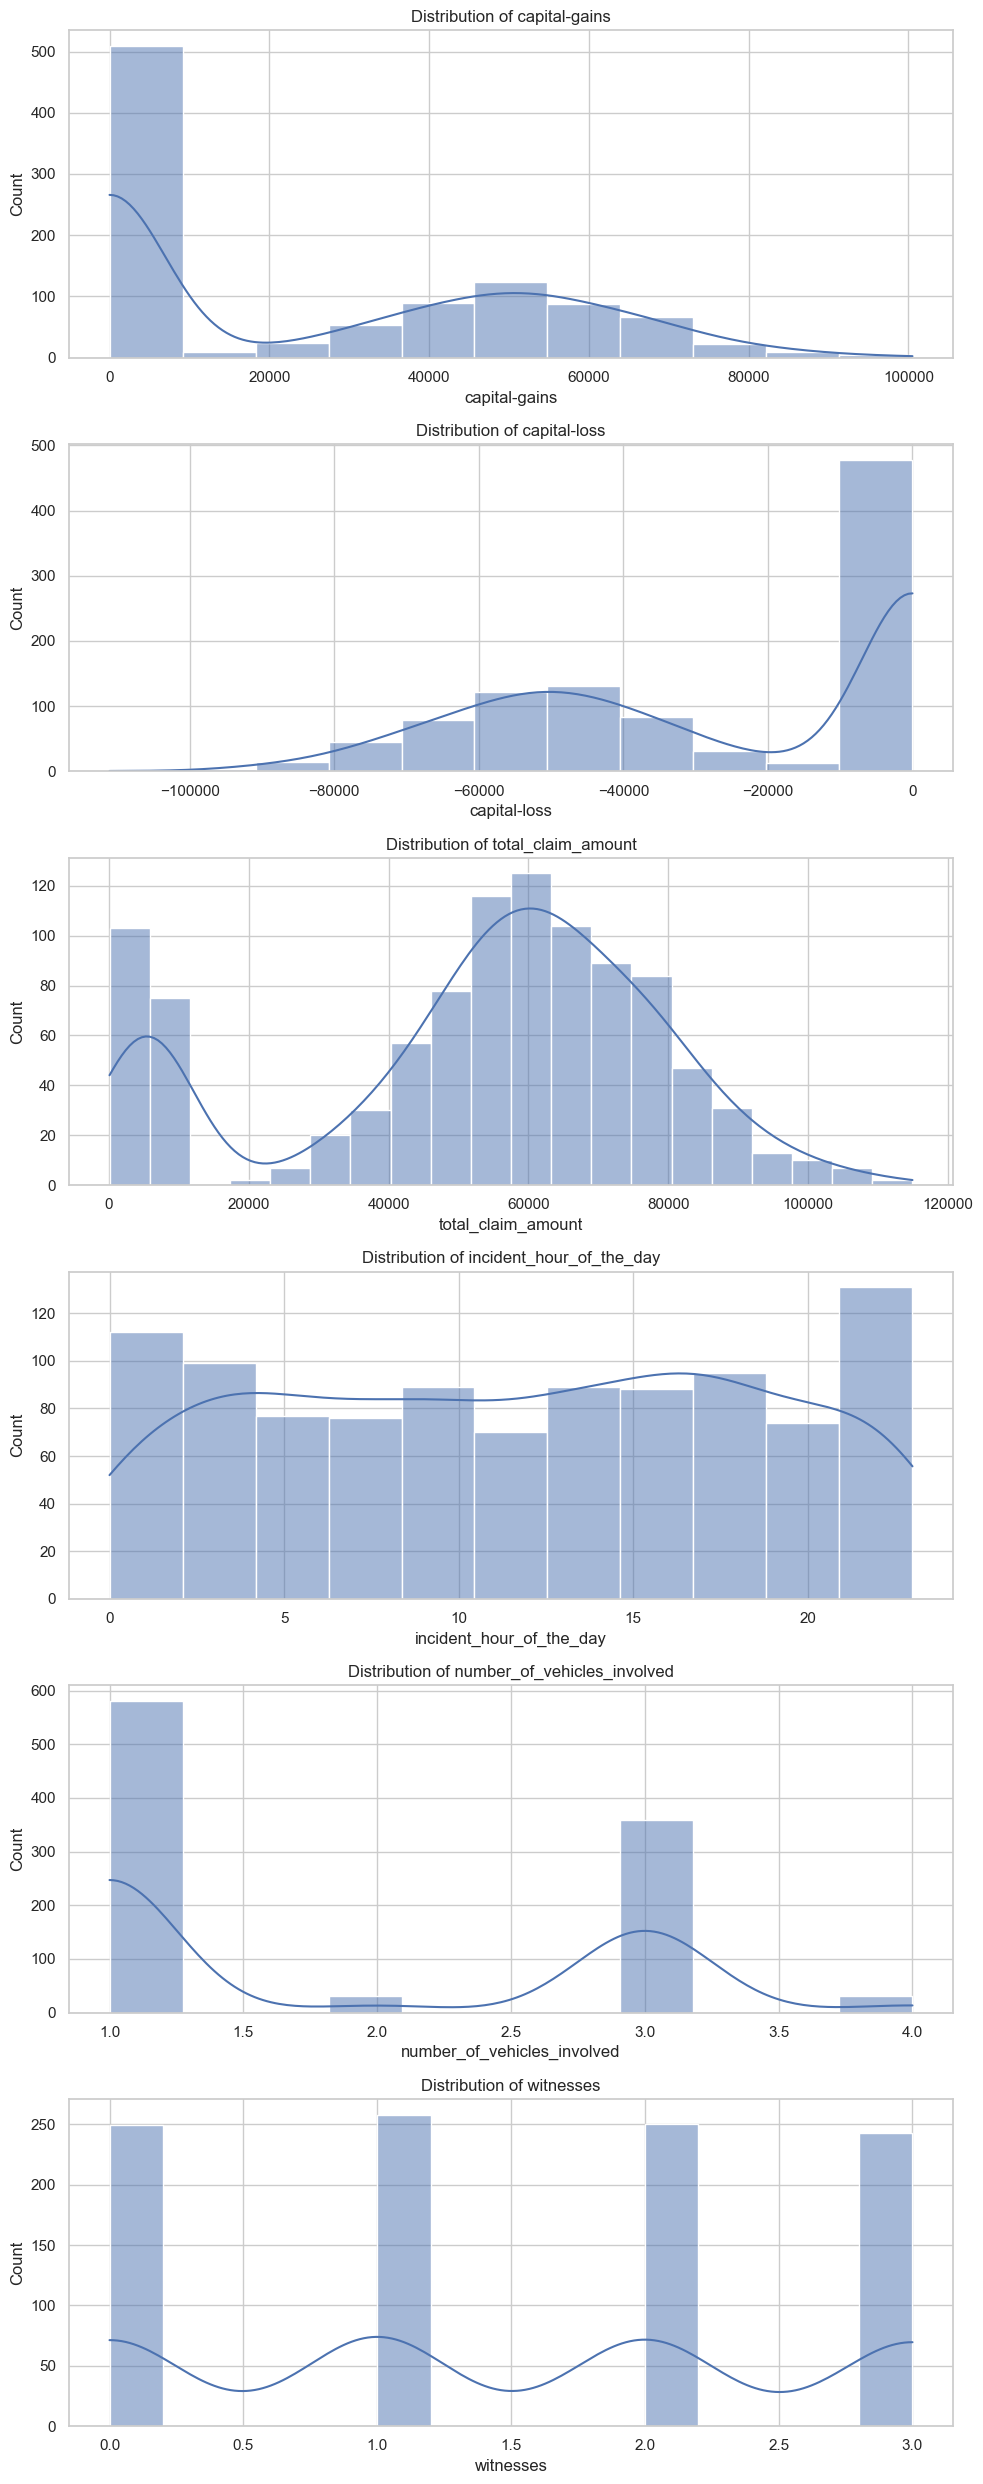

In [9]:
# Pembuatan grafik visualisasi data
sns.set(style="whitegrid")

num_cols = ['capital-gains', 'capital-loss', 'total_claim_amount', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'witnesses']
fig, axes = plt.subplots(len(num_cols), 1, figsize=(10, 25))

for i, col in enumerate(num_cols):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [10]:
# Membuat fungsi prediksi
def predict_fraud_with_accuracy(input_data):
    # Pembuatan model prediksi
    dataProcess = data

    # Pembuatan matriks berdasarkan data
    X = dataProcess.drop(columns=['fraud_reported'])
    y = dataProcess['fraud_reported']

    # Memisahkan kolom dengan kategori dan integer
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_cols = X.select_dtypes(include=['number']).columns


    numerical_transformer = StandardScaler()


    categorical_transformer = OneHotEncoder(handle_unknown='ignore')


    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])


    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ])


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model_pipeline.fit(X_train, y_train)

    joblib.dump(model_pipeline, 'insurance_fraud_model.pkl')

    # Merubah data menjadi data frame
    sample_df = pd.DataFrame(sample_data_fraud)

    prediction = model_pipeline.predict(sample_df)

    y_pred_test = model_pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_test)

    return prediction, accuracy

In [11]:
# Contoh Skenario
sample_data_fraud = {
    'capital-gains': [53300],
    'capital-loss': [0],
    'incident_hour_of_the_day': [5],
    'number_of_vehicles_involved': [1],
    'witnesses': [2],
    'total_claim_amount': [71610],
    'insured sex': ['Male'],
    'occupation': ['craft-repair'],
    'hobbies': ['other'],
    'incident type': ['Single Vehicle Collision'],
    'collision type': ['?'],
    'incident severity': ["Major Damage"],
    'authorities contacted': ["Police"],
    'age group': ['46-50'],
    'months as customer groups': ['301-350'],
    'policy anual premium group': ['medium']
}

# Memprediksi berdasarkan data apakah sebuah penipuan asuransi atau bukan & akurasinya
is_fraud, model_accuracy = predict_fraud_with_accuracy(sample_data_fraud)

if is_fraud:
    print("Penipuan Asuransi")
else:
    print("Bukan Penipuan Asuransi")

print(f"Akurasi Model: {model_accuracy * 100:.2f}%")

Penipuan Asuransi
Akurasi Model: 79.33%
